# Лабораторная работа №6

# Морозова Маргарита

### Вариант 12

In [2]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
import pywt
%matplotlib inline

Создаем зашумленный временной ряд с 2 периодиками:

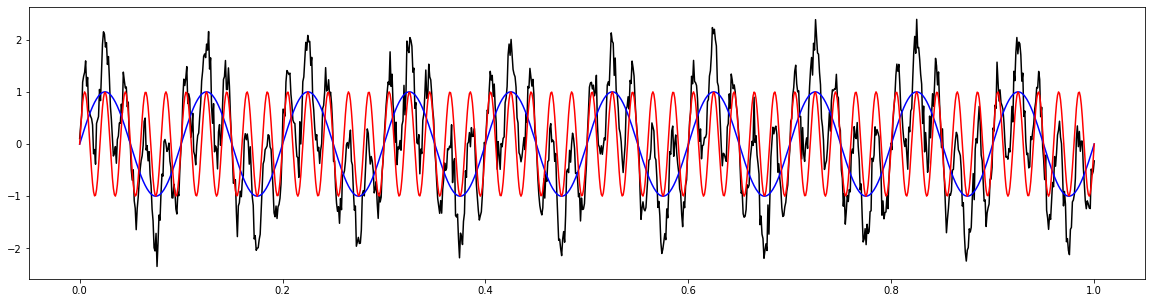

In [6]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()

### Используем вейвлет Мейера:

In [7]:
wvlt = pywt.Wavelet('dmey')
pywt.dwt_max_level(len(F), wvlt) # будет выведено число 4

4

Разобьем наш исходный ряд на компоненты с помощью вейвлета Мейера, в режиме периодизации, до 4 уровня декомпозиции:


In [8]:
cA4, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=4)

Восстановим две периодики исходного модельного ряда:

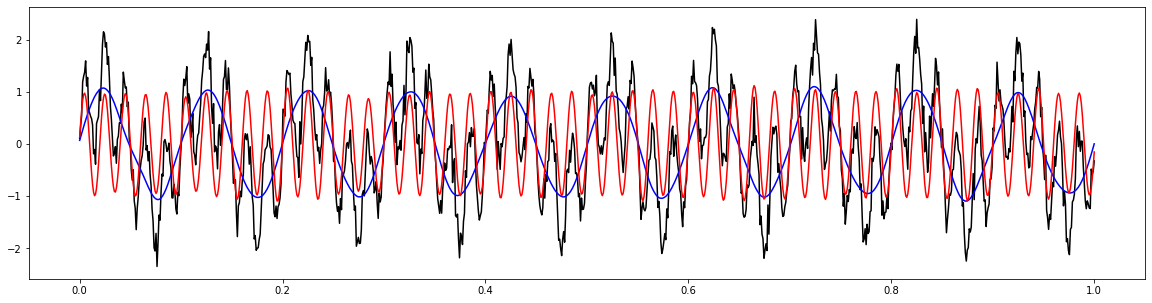

In [10]:
Fre = pywt.waverec((cA4, None, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD4, None, None, None), wvlt, mode='periodization')
plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre, 'b') # это будет первая периодика
plt.plot(t, Fre2, 'r') # это будет вторая периодика
plt.show()

Проведем аналогичную декомпозицию для 3 уровня (level = 3).

In [12]:
cA3, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=3)

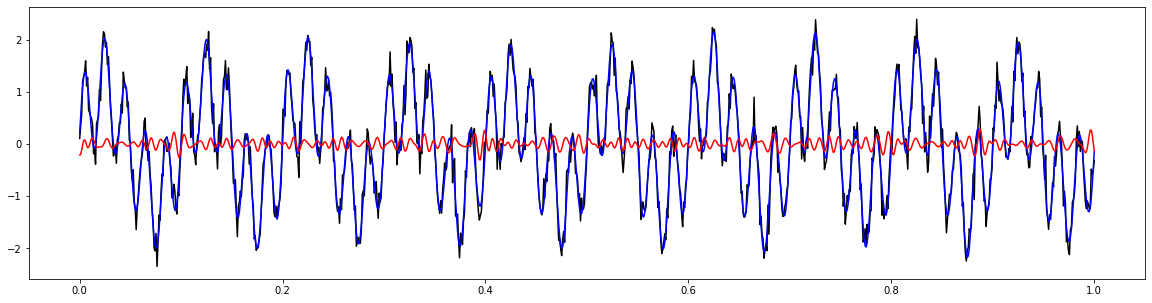

In [13]:
Fre = pywt.waverec((cA3, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD3, None, None), wvlt, mode='periodization')

plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre, 'b') # первая периодика
plt.plot(t, Fre2, 'r') # вторая периодика
plt.show()

Получили разные восстановленные периодики, по сравнению с 4 уровнем декомпозиции.

Повторяем все проделанные шаги по декомпозиции ряда и восстановлению его компонент для своего варианта базисного вейвлета (db6)

In [18]:
wvlt = pywt.Wavelet('db6')
pywt.dwt_max_level(len(F), wvlt)

6

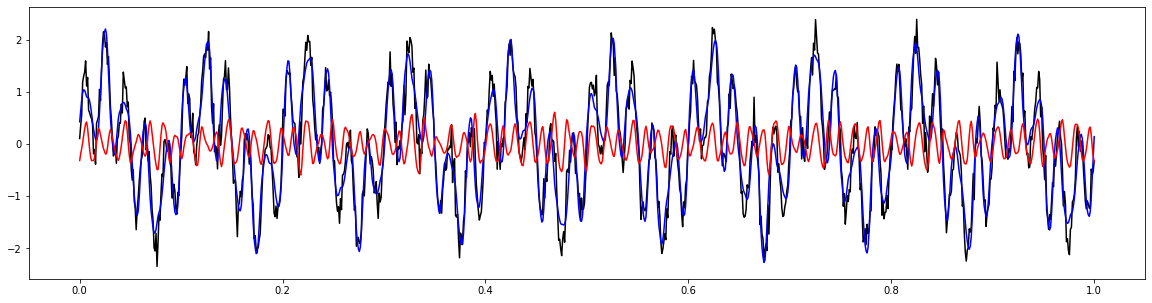

In [19]:
cA3, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=3)

Fre = pywt.waverec((cA3, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD3, None, None), wvlt, mode='periodization')

plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre, 'b') # первая периодика
plt.plot(t, Fre2, 'r') # вторая периодика
plt.show()

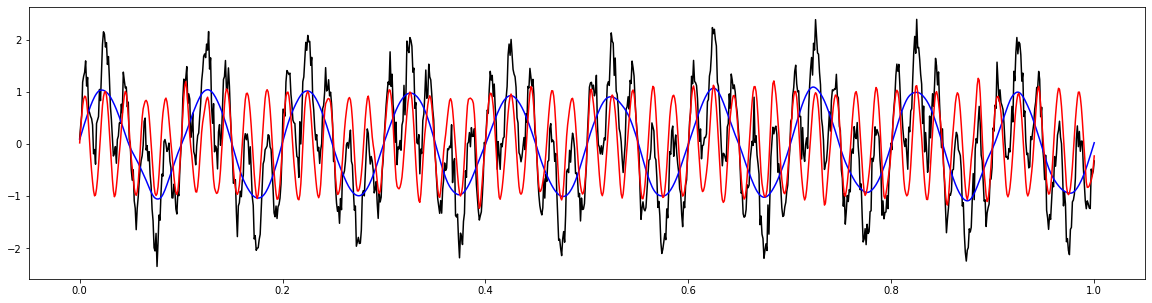

In [21]:
cA4, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=4)

Fre = pywt.waverec((cA4, None, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD4, cD3, None, None), wvlt, mode='periodization')

plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre, 'b') # первая периодика
plt.plot(t, Fre2, 'r') # вторая периодика
plt.show()

Разбиение до 4 уровня декомпозиции кажется наиболее точным.

### Стационарное Вейвлет Преобразование

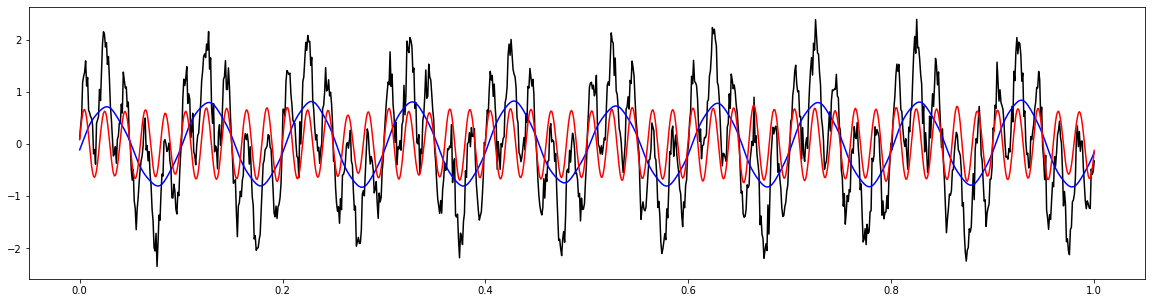

In [25]:
wvlt = pywt.Wavelet('db6')
pywt.dwt_max_level(len(F), wvlt)

(cA5, cD5), (cA4, cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1) = pywt.swt(F, wvlt, level=5)

rr1 = pywt.iswt([(cA5, cD5)], wvlt)
rr2 = pywt.iswt([(cD4, cD3)], wvlt)
plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, rr1/5, 'b') # перенормируем
plt.plot(t, rr2/4, 'r') # перенормируем
plt.show()

### Пакетная Вейвлет Декомпозициия

Создадим общую пакетную декомпозицию: 

In [26]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization')
print([node.path for node in wp.get_level(4, 'freq')]) # выводим все комбинации узлов, упорядоченные по их частотной ширине спектра

['aaaa', 'aaad', 'aadd', 'aada', 'adda', 'addd', 'adad', 'adaa', 'ddaa', 'ddad', 'dddd', 'ddda', 'dada', 'dadd', 'daad', 'daaa']


Удаляем один из узлов

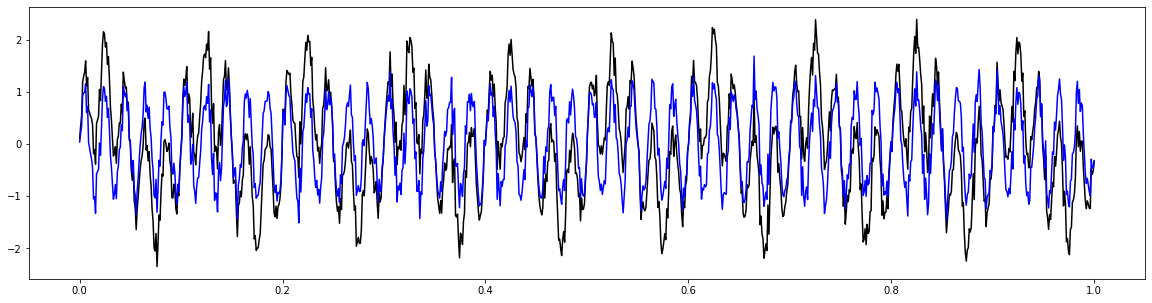

In [28]:
del wp['aaaa'] # удалим самый «глубокий» узел
reF = wp.reconstruct() # и восстановим ряд …
plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF, 'b') # получим нечто периодическое, плохого качества
plt.show()

Так как удаление узлов не привело к желаемым результатам, возможно есть смысл делать отдельную выборку ветвей этих узлов:

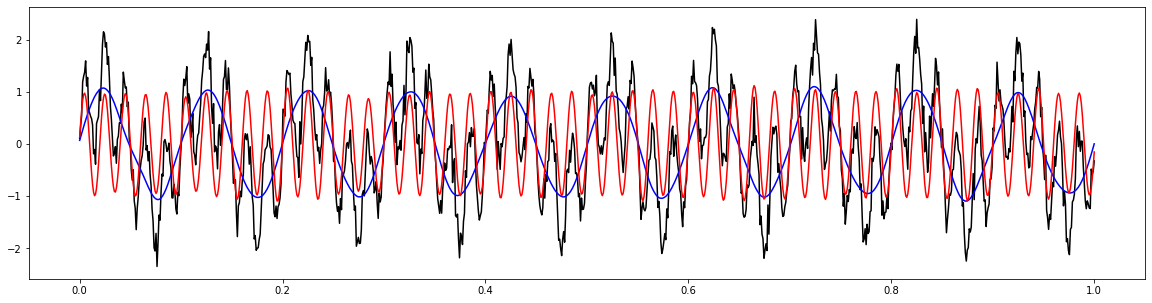

In [30]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaad'] = wp['aaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2
plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF1, 'b') # компонента 1
plt.plot(t, reF2, 'r') # компонента 2
plt.show()

### Проделаем подобную декомпозицию WPD для своего варианта вейвлета

In [50]:
wp = pywt.WaveletPacket(data=F, wavelet='db6', mode='periodization')
print([node.path for node in wp.get_level(3, 'freq')]) # 3 уровень

['aaa', 'aad', 'add', 'ada', 'dda', 'ddd', 'dad', 'daa']


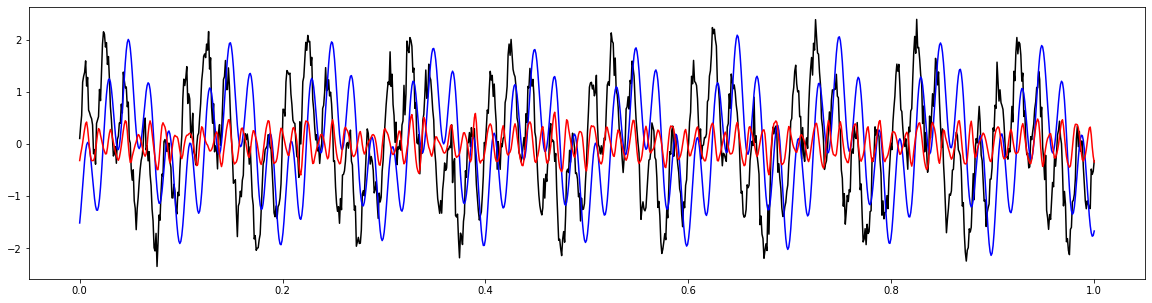

In [51]:
wp = pywt.WaveletPacket(data=F, wavelet='db6', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaa'] = wp['aaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
new_wp['aad'] = wp['aad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2

plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF1, 'b') # компонента 1
plt.plot(t, reF2, 'r') # компонента 2
plt.show()

In [52]:
wp = pywt.WaveletPacket(data=F, wavelet='db6', mode='periodization')
print([node.path for node in wp.get_level(4, 'freq')]) # 4 уровень

['aaaa', 'aaad', 'aadd', 'aada', 'adda', 'addd', 'adad', 'adaa', 'ddaa', 'ddad', 'dddd', 'ddda', 'dada', 'dadd', 'daad', 'daaa']


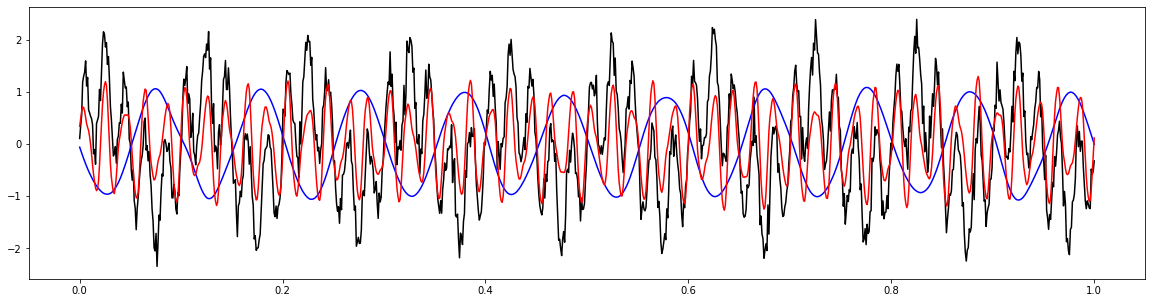

In [53]:
wp = pywt.WaveletPacket(data=F, wavelet='db6', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
new_wp['aaad'] = wp['aaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2

plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF1, 'b') # компонента 1
plt.plot(t, reF2, 'r') # компонента 2
plt.show()

In [54]:
wp = pywt.WaveletPacket(data=F, wavelet='db6', mode='periodization')
print([node.path for node in wp.get_level(5, 'freq')]) # 5 уровень

['aaaaa', 'aaaad', 'aaadd', 'aaada', 'aadda', 'aaddd', 'aadad', 'aadaa', 'addaa', 'addad', 'adddd', 'addda', 'adada', 'adadd', 'adaad', 'adaaa', 'ddaaa', 'ddaad', 'ddadd', 'ddada', 'dddda', 'ddddd', 'dddad', 'dddaa', 'dadaa', 'dadad', 'daddd', 'dadda', 'daada', 'daadd', 'daaad', 'daaaa']


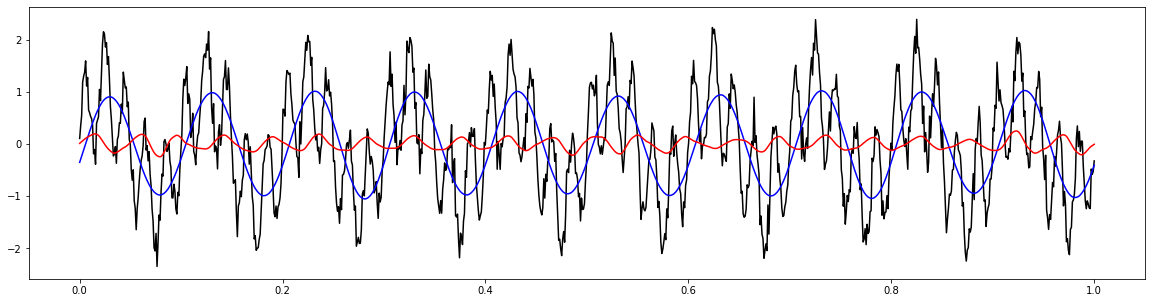

In [63]:
wp = pywt.WaveletPacket(data=F, wavelet='db6', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaaaa'] = wp['aaaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1

new_wp = pywt.WaveletPacket(data=None, wavelet='db6', mode='periodization')
new_wp['aaaad'] = wp['aaaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2

plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF1, 'b') # компонента 1
plt.plot(t, reF2, 'r') # компонента 2
plt.show()

Наиболее точная декомпозоция для 1 компоненты получилась на 5 уровне, для 2 компоненты на 4 уровне.

Декомпозируем сигнал с частотным изломом на 2 периодические компоненты, разделенные по времени:

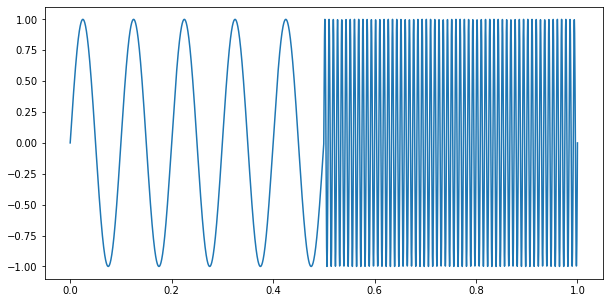

In [66]:
t = np.linspace(0, 1, 4096)
xf = np.zeros(4096)
for i in range(0, len(t)//2):
    xf[i] = np.sin(2*np.pi*10*t[i]) 
for i in range(len(t)//2, len(t)):
    xf[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, xf)
plt.show()

In [67]:
pywt.dwt_max_level(len(xf), wvlt)

8

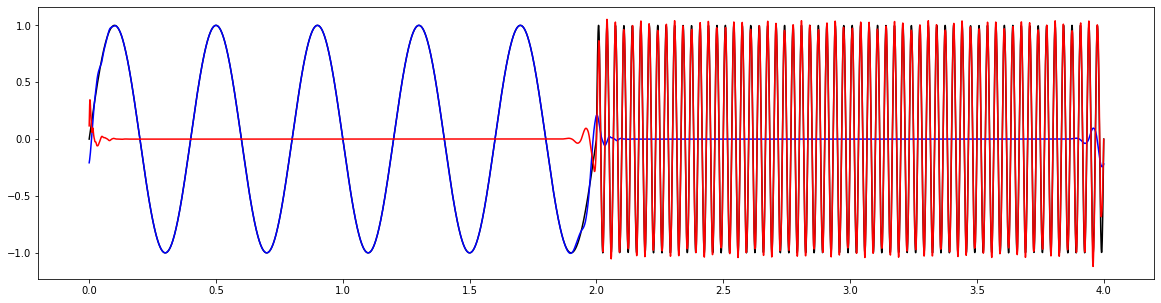

In [71]:
cA5, cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(xf, wvlt, mode='periodization', level=5)

Fre = pywt.waverec((cA5, None, None, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD5, cD4, None, None, None), wvlt, mode='periodization')

plt.figure(figsize = (20, 5))
plt.plot(t, xf, 'k')
plt.plot(t, Fre, 'b')
plt.plot(t, Fre2, 'r')
plt.show()

Попробуйте выделить экспоненциальный тренд из следующего зашумленного временного ряда:

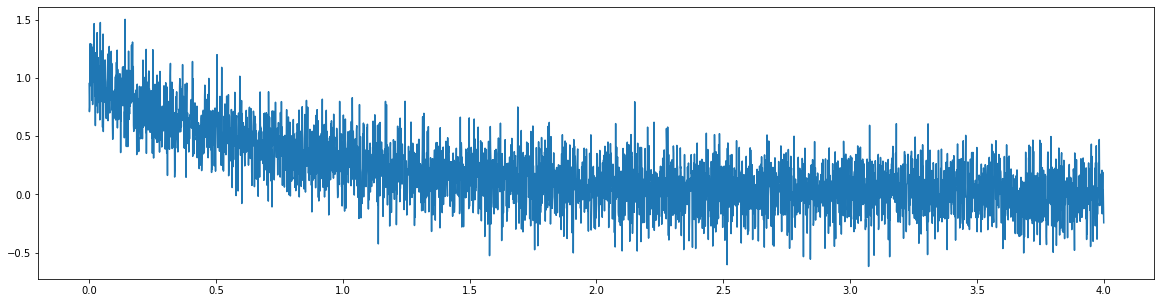

In [72]:
t = np.linspace(0, 4, 4096)
Fexp = np.exp(-0.4*np.pi*t) + 0.2*rand.randn(len(t))
plt.figure(figsize = (20, 5))
plt.plot(t, Fexp)
plt.show()

In [73]:
pywt.dwt_max_level(len(Fexp), wvlt)

8

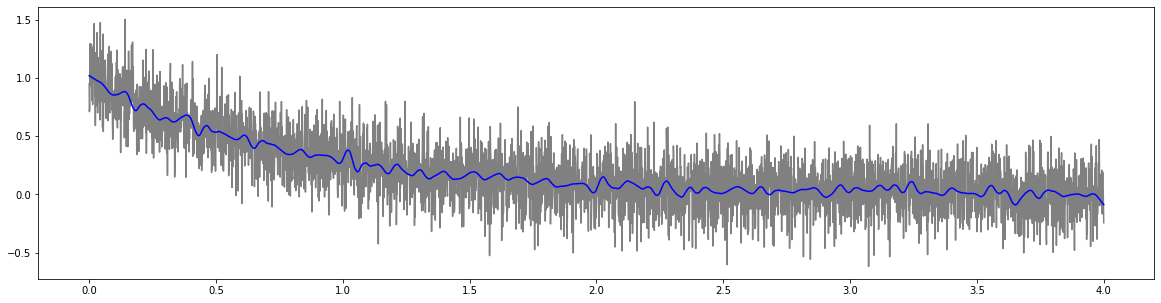

In [75]:
cA7, cD7, cD6, cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(Fexp, wvlt, level=7)

Fre = pywt.waverec((cA7, cD7, cD6, None, None, None, None, None), wvlt)

plt.figure(figsize = (20, 5))
plt.plot(t, Fexp, 'grey')
plt.plot(t, Fre[-4096:], 'b')
plt.show()

Смоделируем временной ряд из 4 гармоник с шумом, и  разделим его на 4 гармоники с помощью вейвлет декомпозиции:

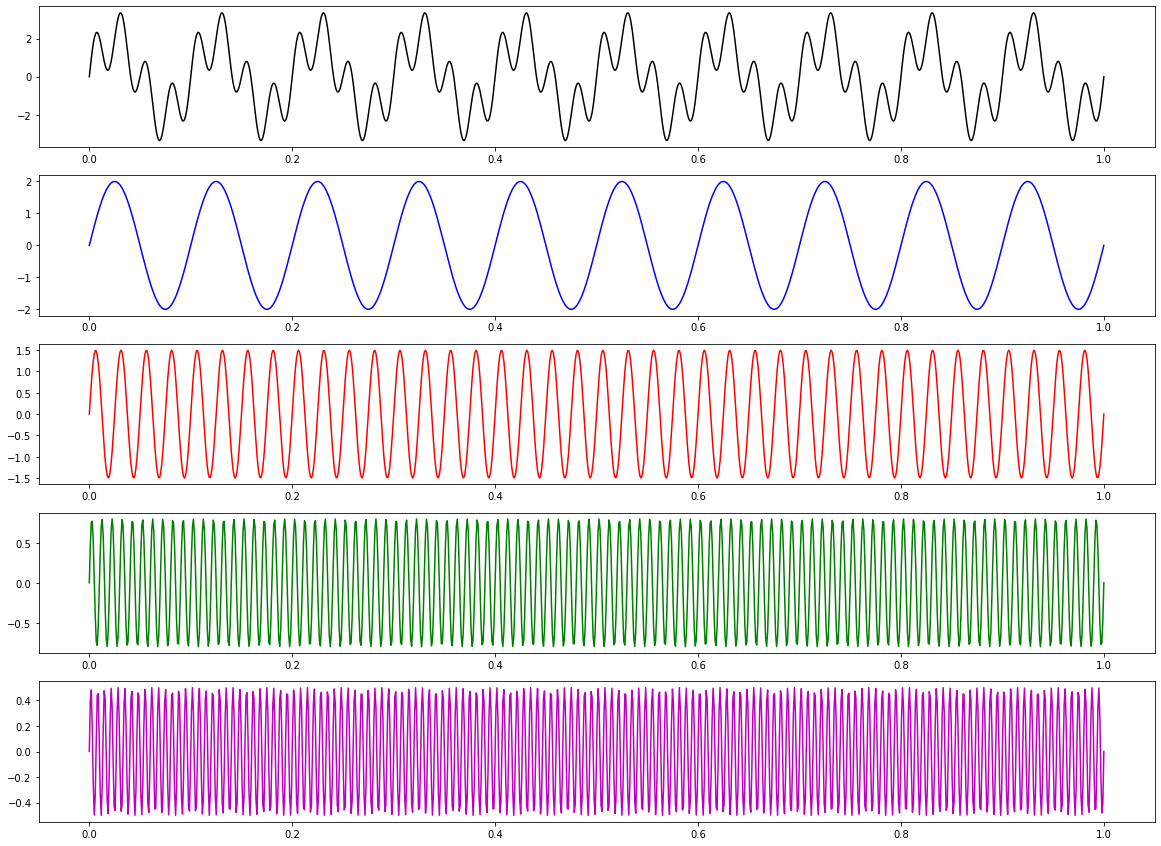

In [77]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)
+0.8*np.sin(2*np.pi*f3*t)
+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (20, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()

In [78]:
pywt.dwt_max_level(len(F), wvlt)

6

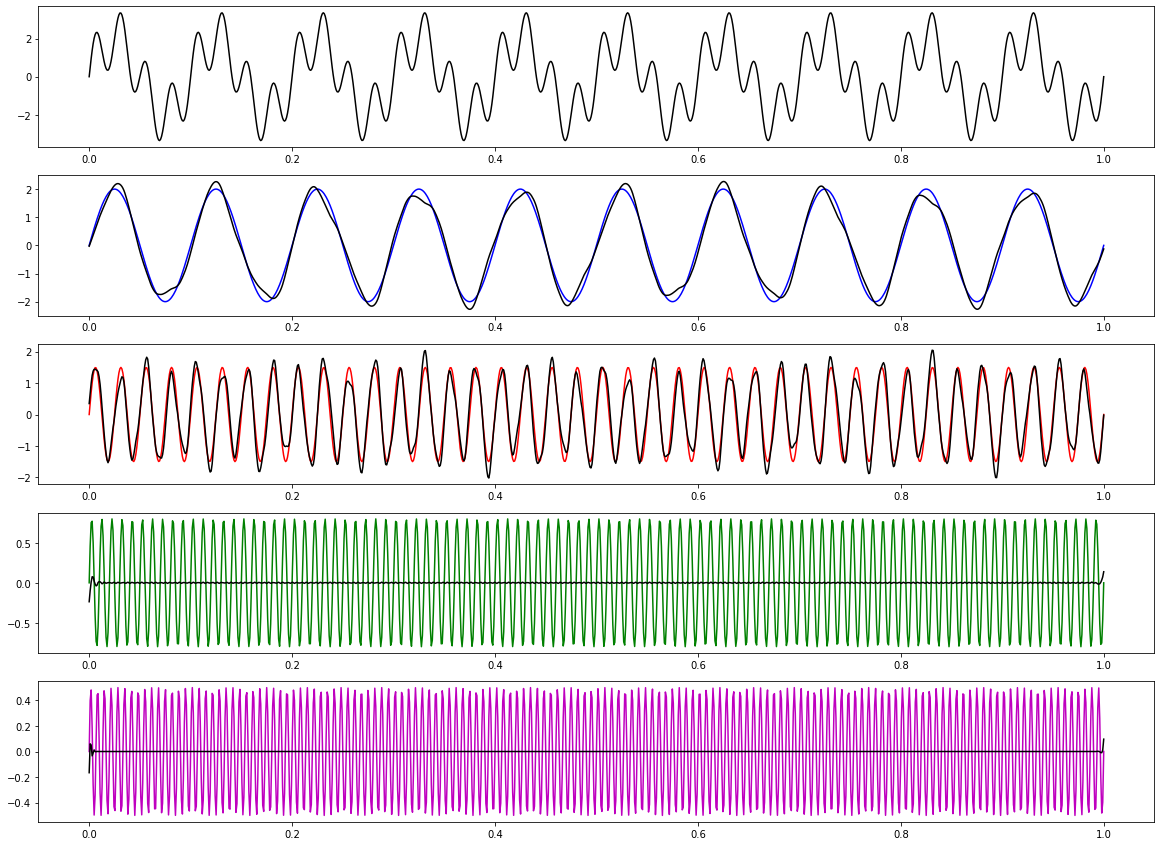

In [84]:
cA5, cD5, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=5)

Komb1 = pywt.waverec((cA6, cD6, None, None, None, None, None), wvlt, mode='periodization')
Komb2 = pywt.waverec((None, cD5, cD4, None, None, None), wvlt, mode='periodization')
Komb3 = pywt.waverec((None, cD2, cD1), wvlt, mode='periodization')
Komb4 = pywt.waverec((None, cD1), wvlt, mode='periodization')

plt.figure(figsize = (20, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, Komb1, 'k')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.plot(t, Komb2, 'k')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.plot(t, Komb3, 'k')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.plot(t, Komb4, 'k')
plt.show()

Данным способом получилось восстановить первые 2 гармоники.